## License

# Bookstores vs Income

### Intro
This is a data science project, finding out if there is a correlation between income and Waterstones bookstores in London.

## Setup / Dependencies 

In [13]:
# for analysis
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from scipy import stats
import numpy as np

# optional
import warnings
warnings.filterwarnings('ignore')


## Download dataset

In [14]:
df = pd.read_csv('dataset.csv')
excel_df = pd.read_excel('income-of-tax-payers.xls', sheet_name=1)

## Explore data

In [15]:
df.head()

,Bookstore name,Street_name,Town,Postcode
0,Preston,"3-5 Fishergate, Preston , PR1 3NN",NaN,NaN
1,Richmond,"2-6 Hill Street, Richmond , TW9 1TN",NaN,NaN
2,Shrewsbury,"18-19 High Street, Shrewsbury , SY1 1SJ",NaN,NaN
3,Edinburgh - Fort Kinnaird,"31B Fort Kinnaird, Edinburgh, EH15 3RD",NaN,NaN
4,Stratford-upon-Avon,"8-9 The High Street, Stratford-upon-Avon , CV3...",NaN,NaN


In [16]:
excel_df.head()

,Unnamed: 0,Unnamed: 1,1999-00,Unnamed: 3,Unnamed: 4,2000-01,Unnamed: 6,Unnamed: 7,2001-02,Unnamed: 9,...,Unnamed: 43,2014-15,Unnamed: 45,Unnamed: 46,2015-16,Unnamed: 48,Unnamed: 49,2016-17,Unnamed: 51,Unnamed: 52
0,Code,Area,Number of Individuals,Mean £,Median £,Number of Individuals,Mean £,Median £,Number of Individuals,Mean £,...,Median £,Number of Individuals,Mean £,Median £,Number of Individuals,Mean £,Median £,Number of Individuals,Mean £,Median £
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000001,City of London,10000,109800,40400,10000,137000,65000,12000,92900,...,65300,9000,144000,61100,10000,142000,60000,12000,157000,57300
3,E09000002,Barking and Dagenham,62000,16200,15100,71000,18100,15600,56000,18600,...,21000,74000,25500,21800,83000,25900,22100,88000,26700,23300
4,E09000003,Barnet,161000,26800,18700,156000,30800,19400,159000,30400,...,26800,175000,45800,27100,178000,49000,27700,180000,48600,28800


## Extracting data

Below we set up a few regex patterns to extract the postcodes and street names into diffrent columns

In [17]:
Postcodes = ['EN', 'IG', 'RM', 'DA', 'BR', 'TN', 'CR', 'SM', 'KT',
             'TW', 'HA', 'UB', 'E', 'EC', 'N', 'NW', 'SE', 'SW', 'W', 'WC']

Postcode_regex = '([A-Z]{1,2}[0-9][0-9A-Z]? [0-9][A-Z]{2})'


London_postcode_regex = '([^A-Z]E[0-9]|EC[0-9]|[^A-Z]N[0-9]|NW[0-9]|SE[0-9]|SW[0-9]|[^A-Z]W[0-9]|WC[0-9]|[E]N[0-9]|[I]G[0-9]|[R]M[0-9]|[D]A[0-9]|[B]R[0-9]|[T]N[0-9]|[C]R[0-9]|[S]M[0-9]|[K]T[0-9]|[T]W[0-9]|[H]A[0-9]|[U]B[0-9])'
Greater_london_postcode_regex = '([E]N[0-9]|[I]G[0-9]|[R]M[0-9]|[D]A[0-9]|[B]R[0-9]|[T]N[0-9]|[C]R[0-9]|[S]M[0-9]|[K]T[0-9]|[T]W[0-9]|[H]A[0-9]|[U]B[0-9])'
London_bookstore_name_regex = '(London -)'

dataset_df = pd.read_csv('dataset.csv')
dataset_df['Postcode'] = dataset_df[' Street_name'].str.extract(Postcode_regex)
dataset_df = dataset_df.drop('Town', axis=1)
filtered_greater_london = dataset_df.Postcode.str.contains(Greater_london_postcode_regex)
filtered_inner_london = dataset_df['Bookstore name'].str.contains(London_bookstore_name_regex)

non_bool_filtered_greater_london = dataset_df[
    dataset_df.Postcode.str.contains(Greater_london_postcode_regex) == True]
non_bool_filtered_inner_london = dataset_df[dataset_df['Bookstore name'].str.contains(
    London_bookstore_name_regex) == True]


# print(non_bool_filtered_greater_london.head(10))
# print(non_bool_filtered_inner_london.head(10))

dataset_df['Greater_london'] = filtered_greater_london
dataset_df['Inner_london'] = filtered_inner_london
# dataset_df = dataset_df.drop(' Street_name', axis=1)

frames = [non_bool_filtered_greater_london, non_bool_filtered_inner_london]

result = pd.concat(frames)

result

# result.to_csv('filtered_dataset.csv', index=False)

,Bookstore name,Street_name,Postcode
1,Richmond,"2-6 Hill Street, Richmond , TW9 1TN",TW9 1TN
9,Romford,"Lockwood Walk, The Liberty, Romford , RM1 3RJ",RM1 3RJ
20,Rye,"25 High Street, Rye, TN31 7JF",TN31 7JF
25,Orpington,"Unit 16 Nugent Shopping Park, Orpington, BR5 3RP",BR5 3RP
26,Lakeside,"Unit 69, Lakeside Shopping Centre, Thurrock, R...",RM20 2ZG
27,Walton-on-Thames,"12/13 The Heart Shopping Centre, Walton-on-Tha...",KT12 1GH
38,Uxbridge,"240a Intu Uxbridge, Uxbridge, UB8 1GB",UB8 1GB
51,Epsom,"50 High St, Epsom, KT19 8AJ",KT19 8AJ
54,Enfield,"26 Church Street, Enfield, EN2 6BE",EN2 6BE
72,Staines,"77 High Street, Staines, TW18 4PQ",TW18 4PQ


Now we mutiplate the data of the incomes

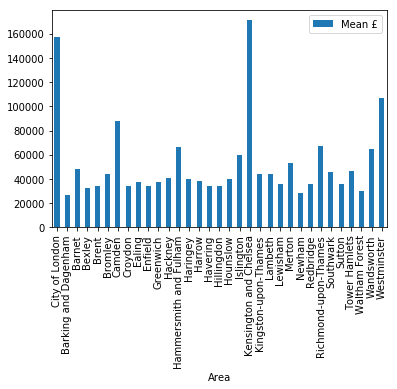

In [18]:
tax_year = excel_df[['Unnamed: 1', '2016-17', 'Unnamed: 51', 'Unnamed: 52']]
tax_year = tax_year.dropna()
tax_year = tax_year.drop(tax_year.index[34:])
new_header = tax_year.iloc[0]
tax_year = tax_year[1:]
tax_year.columns = new_header
# print(tax_year)

# for col in tax_year.columns:
#     print(col)

tax_year_without_pop = tax_year.drop('Number of Individuals', axis=1)
# print(tax_year_without_pop)

tax_year_without_pop.plot(kind='bar', x='Area', y='Mean £')
plt.show()

We remove the prefixes in the borough names and collect all the names of the boroughs in a list

In [19]:
bookstore_df = pd.read_csv('filtered_dataset_boroughs.csv')
count = bookstore_df['Borough'].value_counts().rename_axis('Borough').reset_index(name='Count')


count['Borough'] = count['Borough'].str.replace('London Borough of ', '')
count['Borough'] = count['Borough'].str.replace('Royal Borough of ', '')
count['Borough'] = count['Borough'].str.replace('City of Westminster', 'Westminster', regex=True)
count['Borough'] = count['Borough'].str.replace('Corporation', '').str.strip()


compare_1 = tax_year_without_pop['Area'].reset_index(drop=True)
compare_2 = count['Borough']
compare_1 = compare_1.sort_values()
compare_2 = compare_2.sort_values().reset_index(drop=True)

compare_1

compare_2

0                     Barnet
1                    Bromley
2                     Camden
3             City of London
4                    Croydon
5                     Ealing
6                    Enfield
7                  Greenwich
8                   Haringey
9                     Harrow
10                  Havering
11                Hillingdon
12                  Hounslow
13                 Islington
14    Kensington and Chelsea
15      Kingston upon Thames
16                  Lewisham
17                    Merton
18                 Redbridge
19      Richmond upon Thames
20                    Sutton
21             Tower Hamlets
22            Waltham Forest
23                Wandsworth
24               Westminster
Name: Borough, dtype: object

Counting the number of times a borough is referenced, borough with zero calls are appended to the dataframe

In [20]:
idx1 = pd.Index(compare_1)
idx2 = pd.Index(compare_2)
# print(idx1.difference(idx2).values)
append_values = idx1.difference(idx2).values
zero_list = [0] * len(append_values)

# print(append_values)
# print(zero_list)

extra_name_df = pd.DataFrame(list(zip(append_values, zero_list)), columns=['Borough', 'Count'])

# print(extra_name_df)
extra_name_df = extra_name_df.drop([5, 8])
# print(extra_name_df)

count = count.append(extra_name_df, ignore_index=True)


count

# count.to_csv('count_borough.csv', index=False)

,Borough,Count
0,Camden,6
1,Westminster,5
2,Richmond upon Thames,3
3,Kensington and Chelsea,3
4,Wandsworth,3
5,Bromley,2
6,Barnet,2
7,City of London,2
8,Greenwich,1
9,Croydon,1


Adding a income column to the dataframe

In [21]:
# count.to_csv('count_borough.csv', index=False)

count_df = pd.read_csv('count_borough.csv')
count_df = count_df.sort_values('Borough')
count_df = count_df.reset_index(drop=True)
tax_year_without_pop = tax_year_without_pop.sort_values('Area')
# print(count_df)
# print(tax_year_without_pop)

tax_year_without_pop = tax_year_without_pop.drop('Median £', axis=1)
tax_year_without_pop = tax_year_without_pop.reset_index(drop=True)
# print(tax_year_without_pop)


mean_income = tax_year_without_pop['Mean £']
mean_income = mean_income.reset_index(drop=True)
# print(mean_income)
# count_df = count_df.sort_values(by='Borough')
count_df = count_df.reset_index(drop=True)
count_df['Income'] = mean_income
# print(count_df['Income'])

count_df

,Borough,Count,Income
0,Barking and Dagenham,0,26700
1,Barnet,2,48600
2,Bexley,0,32300
3,Brent,0,34100
4,Bromley,2,44000
5,Camden,6,88000
6,City of London,2,157000
7,Croydon,1,33800
8,Ealing,1,37300
9,Enfield,1,34600


Adding a new column which gives general loaction of the borough

In [22]:
North_names = '(Barnet|Enfield|Haringey)'
South_names = '(Bromley|Croydon|Kingston upon Thames|Merton|Sutton|Wandsworth)'
East_names = '(Barking and Dagenham|Bexley|Greenwich|Hackney|Havering|Lewisham|Newham|Redbridge|Tower Hamlets|Waltham Forest)'
West_names = '(Brent|Ealing|Hammersmith and Fulham|Harrow|Richmond upon Thames|Hillingdon|Hounslow)'
Central_names = '(Camden|City of London|Kensington and Chelsea|Islington|Lambeth|Southwark|Westminster)'

count_df['Compass'] = [0] * len(count_df['Borough'])

count_df['Compass'] = count_df['Compass'].mask((count_df['Borough'].str.contains(
    North_names) == True), other='North')

count_df['Compass'] = count_df['Compass'].mask((count_df['Borough'].str.contains(
    South_names) == True), other='South')

count_df['Compass'] = count_df['Compass'].mask((count_df['Borough'].str.contains(
    East_names) == True), other='East')

count_df['Compass'] = count_df['Compass'].mask((count_df['Borough'].str.contains(
    West_names) == True), other='West')

count_df['Compass'] = count_df['Compass'].mask((count_df['Borough'].str.contains(
    Central_names) == True), other='Central')


# count_df


# count_df.to_csv('Borough_income_count.csv', index=False)

compass_df = pd.read_csv('Borough_income_count.csv')

compass_df

,Borough,Count,Income,Compass
0,Barking and Dagenham,0,26700,East
1,Barnet,2,48600,North
2,Bexley,0,32300,East
3,Brent,0,34100,West
4,Bromley,2,44000,South
5,Camden,6,88000,Central
6,City of London,2,157000,Central
7,Croydon,1,33800,South
8,Ealing,1,37300,West
9,Enfield,1,34600,North


## Plotting Data

In [23]:
compass_df.describe()

,Count,Income
count,33.000000,33.000000
mean,1.303030,52603.030303
std,1.380327,33506.533736
min,0.000000,26700.000000
25%,1.000000,34600.000000
50%,1.000000,39900.000000
75%,1.000000,53200.000000
max,6.000000,171000.000000


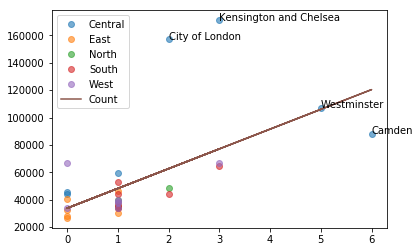

In [24]:

groups = compass_df.groupby('Compass')
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_xlim(-.4, .4)
for name, group in groups:
    ax.plot(group["Count"], group["Income"], marker="o", linestyle="", label=name, alpha=0.6)



ax.annotate(compass_df['Borough'].iloc[5],
            (compass_df['Count'].iloc[5], compass_df['Income'].iloc[5]))

ax.annotate(compass_df['Borough'].iloc[6],
            (compass_df['Count'].iloc[6], compass_df['Income'].iloc[6]))

ax.annotate(compass_df['Borough'].iloc[32],
            (compass_df['Count'].iloc[32], compass_df['Income'].iloc[32]))  # Westminster

ax.annotate(compass_df['Borough'].iloc[19],
            (compass_df['Count'].iloc[19], compass_df['Income'].iloc[19]))




x = compass_df['Count'].astype('float')
y = compass_df['Income'].astype('float')

b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-')

ax.legend()

count_df_no_outliers = count_df

count_df_no_outliers['Income'] = count_df_no_outliers['Income'][count_df_no_outliers['Income'].between(
    count_df_no_outliers['Income'].quantile(.15), count_df_no_outliers['Income'].quantile(.85))]

count_df_no_outliers = count_df_no_outliers.dropna()


plt.show()


## Conclusion

From looking at the graph there is a postive corrlation between the number of bookstores in a london borough and its income. Boroughs located in centeral london tended to be outliers in their incomes. Boroughs located in east london tended not to have much stores.(either one or zero)

Thank you for reading my project and hoped you learned something new.